In [1]:
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn.functional as F
from torch.optim import SGD

In [2]:
class BasicNN(nn.Module):
    def __init__(self):
        
        super().__init__()
        #for first feed forward branch of weights biases and activation 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad =False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad =False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        # Second Branch
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        
        # Set the final bias when the nn is created 
        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)
        # need a forward pass to do a forward pass on the weights and biases for weights we just analysed 

    def forward(self,input):
        input_to_toprelu = input* self.w00 + self.b00
        top_relu_output = F.relu(input_to_toprelu) # define to pass relu in this 
        scaled_top_relu = top_relu_output*self.w01 # this is the final for upper branch 


        input_to_bottomrelu = input* self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottomrelu) # define to pass relu in this 
        scaled_bot_relu = bottom_relu_output*self.w11 # this is the final for upper branch 
                        
        final_input_relu = scaled_bot_relu + scaled_top_relu + self.final_bias
                        
        output = F.relu(final_input_relu)
                        
        return output

In [3]:
# need to create input doses to test how good the NN is 

input_doses = torch.linspace(start=0, end = 1 , steps= 30)
input_doses

tensor([0.0000, 0.0345, 0.0690, 0.1034, 0.1379, 0.1724, 0.2069, 0.2414, 0.2759,
        0.3103, 0.3448, 0.3793, 0.4138, 0.4483, 0.4828, 0.5172, 0.5517, 0.5862,
        0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966,
        0.9310, 0.9655, 1.0000])

In [4]:
model = BasicNN()


In [5]:

output_values = model(input_doses)


Text(0, 0.5, 'Effectiveness')

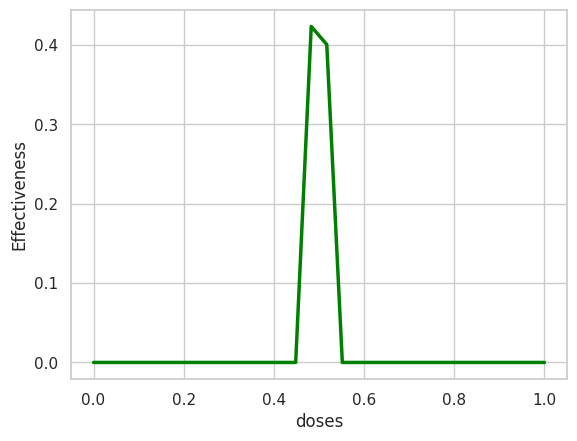

In [6]:
sns.set_theme(style='whitegrid')

sns.lineplot(
    x = input_doses,
    y = output_values,
    color = 'green',
    linewidth = 2.5
)

plt.xlabel("doses")

plt.ylabel('Effectiveness')

## Creating a new iteration of Basic_nn_train for training the NN for backprop

- We change the bias final value to 0 
- We set requires_gradient as true for us there is need for backprop this tells that this parameter needs to be optimised 

In [7]:
class BasicNN_train(nn.Module):
    def __init__(self):
        
        super().__init__()
        #for first feed forward branch of weights biases and activation 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad =False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad =False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        # Second Branch
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        
        # Set the final bias when the nn is created 
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        # need a forward pass to do a forward pass on the weights and biases for weights we just analysed 
        
        # Start for new BasicNN
        
    def forward(self,input):
        input_to_toprelu = input* self.w00 + self.b00
        top_relu_output = F.relu(input_to_toprelu) # define to pass relu in this 
        scaled_top_relu = top_relu_output*self.w01 # this is the final for upper branch 


        input_to_bottomrelu = input* self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottomrelu) # define to pass relu in this 
        scaled_bot_relu = bottom_relu_output*self.w11 # this is the final for upper branch 
                        
        final_input_relu = scaled_bot_relu + scaled_top_relu + self.final_bias
                        
        output = F.relu(final_input_relu)
                        
        return output


In [8]:
# Creating and training for backprop

model = BasicNN_train()

output_values = model(input_doses)

- We put detach() in the y coordinate because we want it to detach from the output values

Text(0, 0.5, 'Effectiveness')

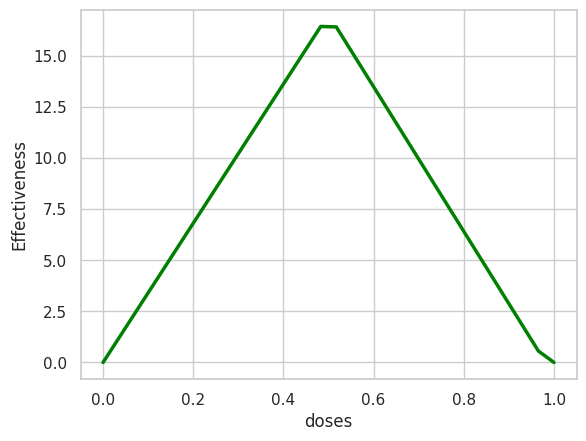

In [9]:
sns.set_theme(style='whitegrid')

sns.lineplot(
    x = input_doses,
    y = output_values.detach(),
    color = 'green',
    linewidth = 2.5
)

plt.xlabel("doses")

plt.ylabel('Effectiveness')

- All we need to do is now create a new testing and training data where the x labels will go as inputs
- and the actual labels will be inside the label variable

In [10]:
inputs = torch.tensor([0,0.5,1.0])
labels = torch.tensor([0.,1.,0.])

In [11]:
optimiser = SGD(model.parameters(), lr = 0.1) # all parameters will be going through stochastic gradient descent 

In [12]:
print("Final Bias before optimisation " + str(model.final_bias.data) + "\n") # this will print the tensor in string format 

for epoch in range(100):
    
    total_loss = 0 # initialise the total loss to be 0 
    
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration]
        labels_i = inputs[iteration]
        
        output_i = model(input_i) # tells what the output values are 
        
        loss = ( output_i - labels_i )**2 # sum of squares is the loss in this case 
        
        loss.backward() # calculate the derivative with the derivative we want to optimise 
        
        total_loss += float(loss)
        
        # each time in this loop loss.backward() will accumulate the loss and then put it back in the loop      
        
    if (total_loss < 0.0001):
        print("number of steps " + str(epoch)) # this tells if we reach the optimum loss value then stop and print the last epoch
        break
    optimiser.step() # helps to keep the gradients in the correct direction 
    optimiser.zero_grad() # makes sure all values set to zero after using grad 
        
    print("step" + str(epoch) + "final Bias " +  str(model.final_bias.data) + "\n")
    
    print("The value of final bias " + str(model.final_bias.data)) # print out the final data stream string 


Final Bias before optimisation tensor(0.)

step0final Bias tensor(-3.3020)

The value of final bias tensor(-3.3020)
step1final Bias tensor(-5.9436)

The value of final bias tensor(-5.9436)
step2final Bias tensor(-8.0569)

The value of final bias tensor(-8.0569)
step3final Bias tensor(-9.7475)

The value of final bias tensor(-9.7475)
step4final Bias tensor(-11.1000)

The value of final bias tensor(-11.1000)
step5final Bias tensor(-12.1820)

The value of final bias tensor(-12.1820)
step6final Bias tensor(-13.0476)

The value of final bias tensor(-13.0476)
step7final Bias tensor(-13.7401)

The value of final bias tensor(-13.7401)
step8final Bias tensor(-14.2941)

The value of final bias tensor(-14.2941)
step9final Bias tensor(-14.7373)

The value of final bias tensor(-14.7373)
step10final Bias tensor(-15.0918)

The value of final bias tensor(-15.0918)
step11final Bias tensor(-15.3754)

The value of final bias tensor(-15.3754)
step12final Bias tensor(-15.6024)

The value of final bias tens